In [12]:

import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

# Hyperparameter search on batch size and step size for SGD

epoch       0.000 | loss_total     1.06247 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.62456 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.68676 | train_AUC    0.50925 | train_MAE    1.00191 | valid_AUC     0.51135 | valid_MAE     1.00724 | grad_wrt_mu     0.11255 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.17859 | train_AUC    0.51603 | train_MAE    1.00178 | valid_AUC     0.51821 | valid_MAE     1.00709 | grad_wrt_mu     1.23529 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.13793 | train_AUC    0.51770 | train_MAE    1.00042 | valid_AUC     0.51962 | valid_MAE     1.00561 | grad_wrt_mu     0.

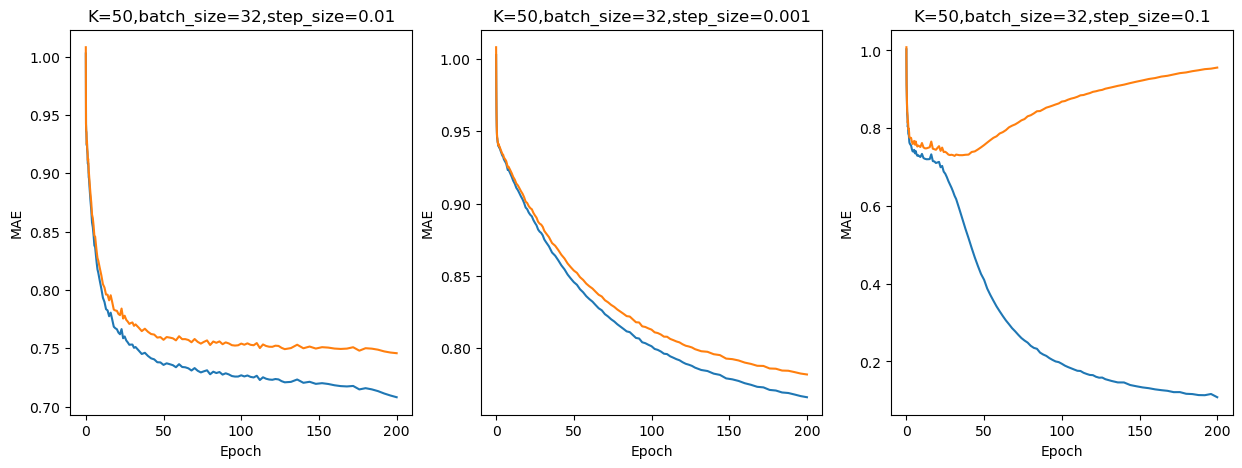

In [17]:
import itertools
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
step_sizes = [0.01, 0.001, 0.1]

# Create subplots for the trace plots
best_maes_per_epoch = {}
fig, axs = plt.subplots(1, len(step_sizes), figsize=(15, 5))

for i, step_size in enumerate(step_sizes):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=200, batch_size=32, step_size=step_size, n_factors=50, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    try:
        model.fit(train_tuple, valid_tuple)
    except ValueError:
        print("Error training as error value is overflowed")
    
    converged_mae = model.trace_mae_valid[len(model.trace_mae_train) - 1]

    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K=50,batch_size={32},step_size={step_size}')


epoch       0.000 | loss_total     1.27349 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.73431 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.002 | loss_total     1.58628 | train_AUC    0.50855 | train_MAE    1.00180 | valid_AUC     0.51118 | valid_MAE     1.00711 | grad_wrt_mu     0.98542 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.004 | loss_total     1.62514 | train_AUC    0.51852 | train_MAE    1.00070 | valid_AUC     0.52140 | valid_MAE     1.00592 | grad_wrt_mu     1.32471 | grad_wrt_b_per_user     0.00216 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.005 | loss_total     1.44235 | train_AUC    0.53014 | train_MAE    0.99922 | valid_AUC     0.53403 | valid_MAE     1.00432 | grad_wrt_mu     1.

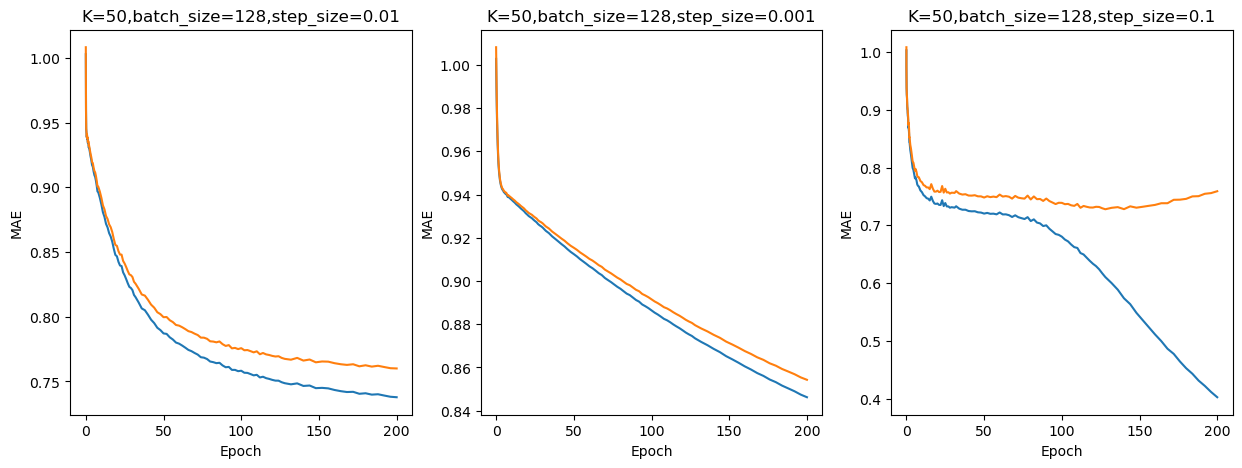

In [16]:

import itertools
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
step_sizes = [0.01, 0.001, 0.1]

# Create subplots for the trace plots
best_maes_per_epoch = {}
fig, axs = plt.subplots(1, len(step_sizes), figsize=(15, 5))

for i, step_size in enumerate(step_sizes):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=200, batch_size=128, step_size=step_size, n_factors=50, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    try:
        model.fit(train_tuple, valid_tuple)
    except ValueError:
        print("Error training as error value is overflowed")
    
    converged_mae = model.trace_mae_valid[len(model.trace_mae_train) - 1]

    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K=50,batch_size=128,step_size={step_size}')


epoch       0.000 | loss_total     1.50095 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.93399 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.014 | loss_total     1.48233 | train_AUC    0.51291 | train_MAE    1.00157 | valid_AUC     0.51527 | valid_MAE     1.00687 | grad_wrt_mu     1.00917 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.029 | loss_total     1.45950 | train_AUC    0.52456 | train_MAE    1.00045 | valid_AUC     0.52673 | valid_MAE     1.00565 | grad_wrt_mu     0.97910 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.043 | loss_total     1.61109 | train_AUC    0.53425 | train_MAE    0.99936 | valid_AUC     0.53481 | valid_MAE     1.00446 | grad_wrt_mu     1.

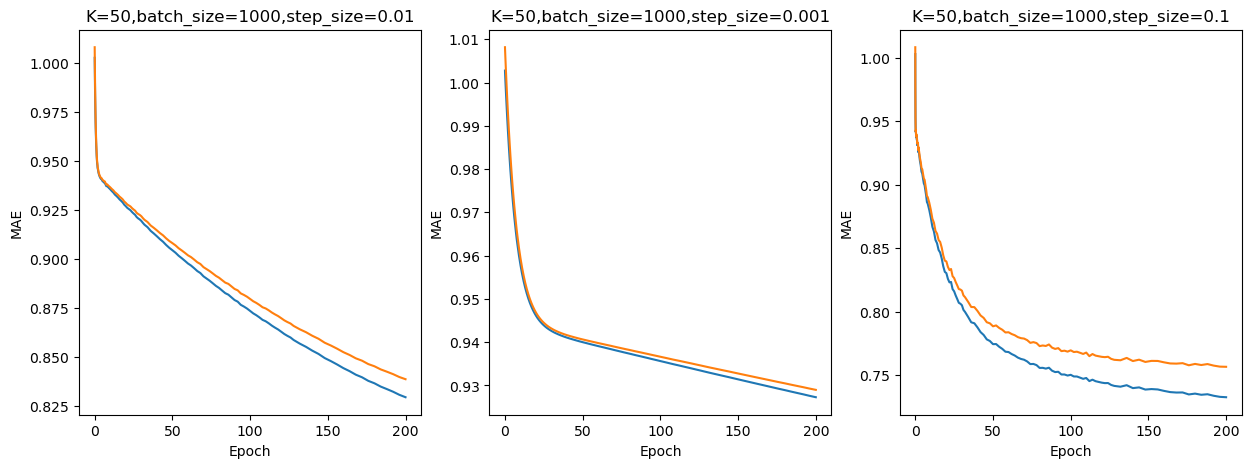

In [18]:
import itertools
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
step_sizes = [0.01, 0.001, 0.1]

# Create subplots for the trace plots
best_maes_per_epoch = {}
fig, axs = plt.subplots(1, len(step_sizes), figsize=(15, 5))

for i, step_size in enumerate(step_sizes):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=200, batch_size=1000, step_size=step_size, n_factors=50, alpha=0.0
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    try:
        model.fit(train_tuple, valid_tuple)
    except ValueError:
        print("Error training as error value is overflowed")
    
    converged_mae = model.trace_mae_valid[len(model.trace_mae_train) - 1]

    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K=50,batch_size=1000,step_size={step_size}')
